# Imports:

In [1]:
from pathlib import Path

from common import CosenoidSignal, Audio
from dsb_modulation import ModulatedSignal as DSBModulation

AUDIO_PATH = Path(r'toy_train_whistle.wav')

# 1) Modulação AM-DSB de um sinal senoidal $m(t) = A_m \cos{\left( 2 \pi f_m t + \phi_m \right)}$:

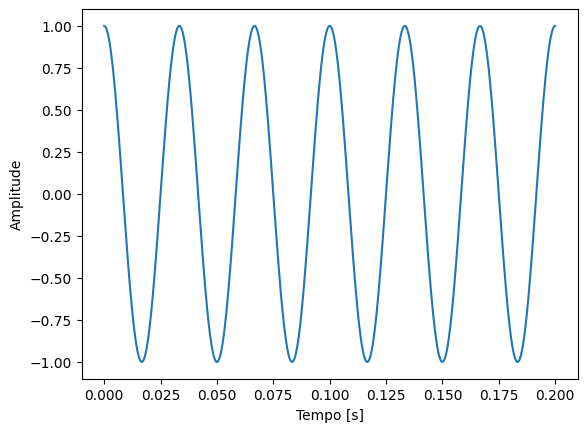

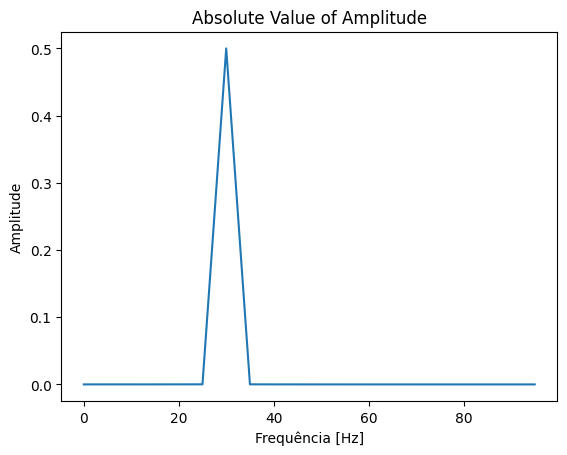

In [2]:
COSENOID_FREQUENCY = 30  # Hertz
SAMPLE_RATE = 100_000  # Hertz
SAMPLE_LENGTH = 0.2  # seconds
COSENOID_AMPLITUDE = 1
COSENOID_PHASE = 0  # degrees

senoid_signal = CosenoidSignal(COSENOID_FREQUENCY, SAMPLE_RATE, SAMPLE_LENGTH,
                      amplitude=COSENOID_AMPLITUDE, phase=COSENOID_PHASE)
senoid_signal.signal.plot_data()
senoid_signal.signal.plot_fourier(start_index=0, end_index=20)

Portadora $c(t) = A_c \cos{\left( 2 \pi f_c t + \phi_c \right)}$:

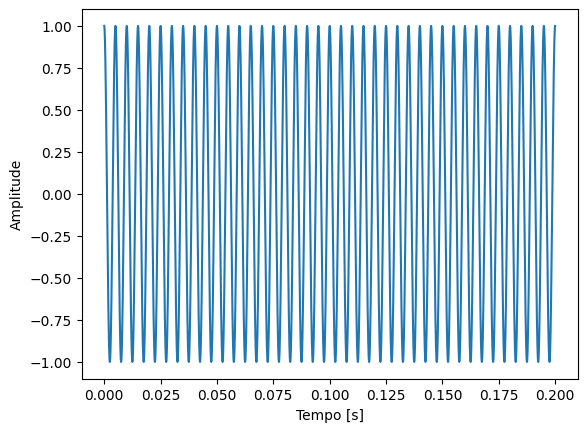

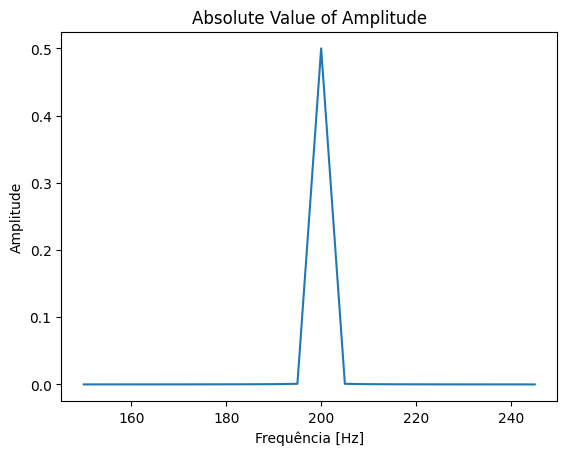

In [3]:
CARRIER_FREQUENCY = 200  # Hertz
CARRIER_AMPLITUDE = 1
CARRIER_PHASE = 0  # degrees

carrier = CosenoidSignal(CARRIER_FREQUENCY, SAMPLE_RATE, SAMPLE_LENGTH,
                       amplitude=CARRIER_AMPLITUDE, phase=CARRIER_PHASE)
carrier.signal.plot_data()
carrier.signal.plot_fourier(start_index=30, end_index=50)

Sinal modulado $s(t) = A_c \left[ 1 + k_a A_m \cos{\left( 2 \pi f_m t + \phi_m \right)} \right] \cos{\left( 2 \pi f_c t \right)}$:

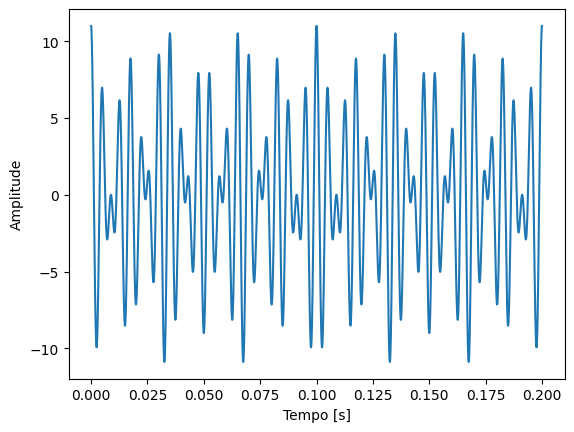

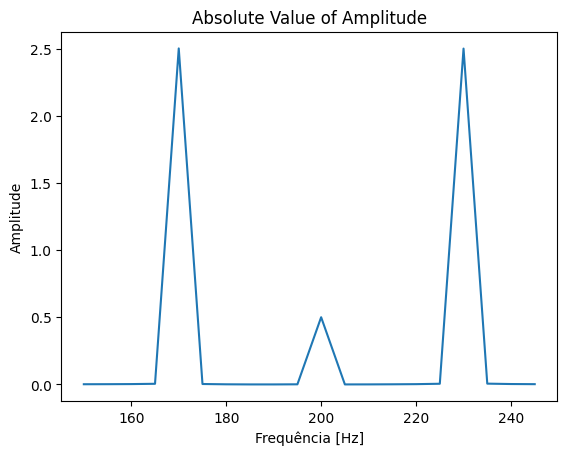

In [4]:
K_A = 10

dsb_modulated_signal = DSBModulation(senoid_signal, carrier, K_A)
dsb_modulated_signal.modulated.plot_data()
dsb_modulated_signal.modulated.plot_fourier(start_index=30, end_index=50)

# Aplicação da modulação AM-DSB acima para um sinal de áudio:

In [5]:
INTERPOLATION_SCALE_FACTOR = 10
train_whistle = Audio(AUDIO_PATH, INTERPOLATION_SCALE_FACTOR)

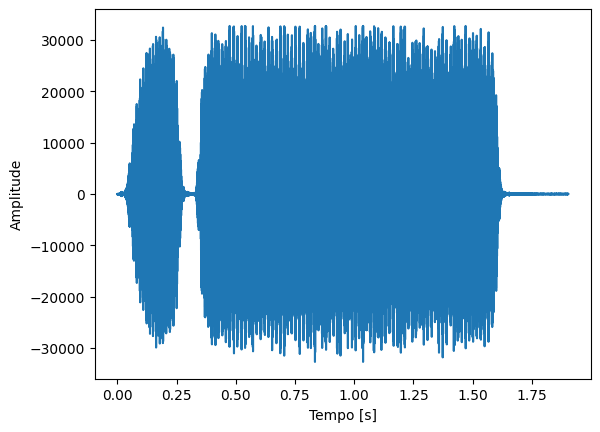

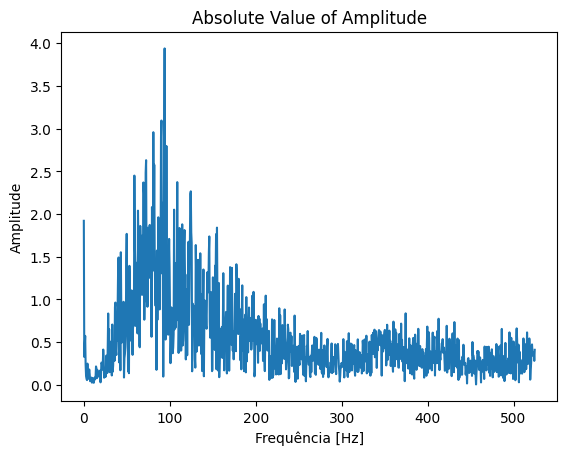

In [6]:
train_whistle.signal.plot_data(start_index=0, end_index=-1)
train_whistle.signal.plot_fourier(start_index=0, end_index=1000)

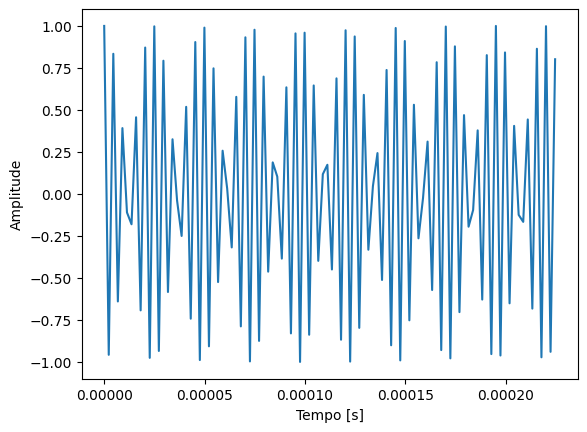

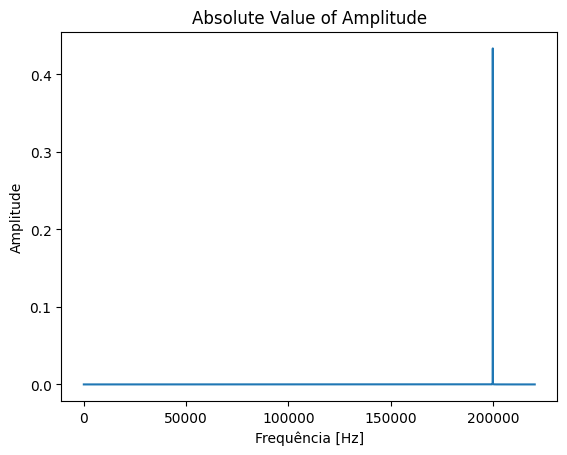

In [7]:
CARRIER_FREQUENCY = 200_000  # Hertz
CARRIER_AMPLITUDE = 1
CARRIER_PHASE = 0  # degrees

train_carrier = CosenoidSignal(CARRIER_FREQUENCY,
                               train_whistle.signal.sample_rate,
                               train_whistle.signal.length,
                               amplitude=CARRIER_AMPLITUDE,
                               phase=CARRIER_PHASE)
train_carrier.signal.plot_data(start_index=0, end_index=100)
train_carrier.signal.plot_fourier(start_index=0, end_index=-1)

Para demodulação não-coerente, temos que ter $1 + k_a m(t) \geq 0, \forall t$. Como o valor mínimo de $m(t)$ é negativo, teremos o valor máximo de $k_a$ tal que $\displaystyle \max{\left( k_{a} \right)} = - \frac{1}{\min{\left[ m(t) \right]}}$.

In [8]:
k_a_max = - 1 / train_whistle.signal.data_array.min()
k_a = 0.8 * k_a_max
modulated_whistle = DSBModulation(train_whistle, train_carrier, k_a)

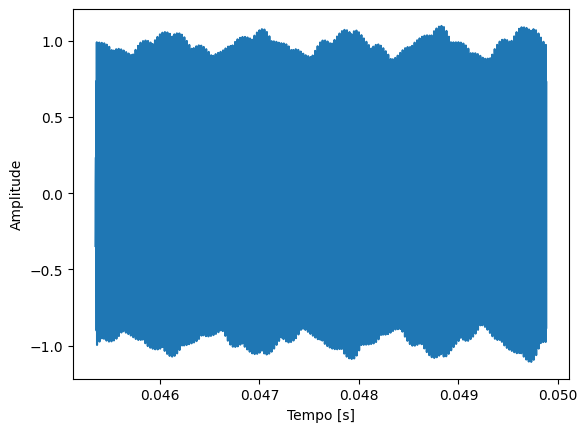

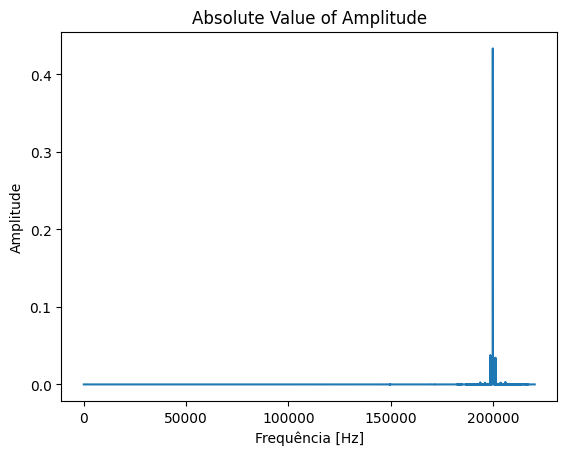

In [9]:
modulated_whistle.modulated.plot_data(start_index=20000, end_index=22000)
modulated_whistle.modulated.plot_fourier(start_index=0, end_index=-1)

Demodulação coerente:

In [38]:
import numpy as np
from scipy.signal import butter, sosfilt

ORDER = 7
CUTOFF_FREQUENCY = 44_100

multiplied = modulated_whistle._multiplying_stage()
sos = butter(ORDER, CUTOFF_FREQUENCY, output='sos', fs=modulated_whistle.sample_rate)
filtered = sosfilt(sos, multiplied)
filtered = filtered - np.mean(filtered)

[ 1.         -0.95764929  0.83418434 ... -0.58373816  0.32522814
 -0.03917084]


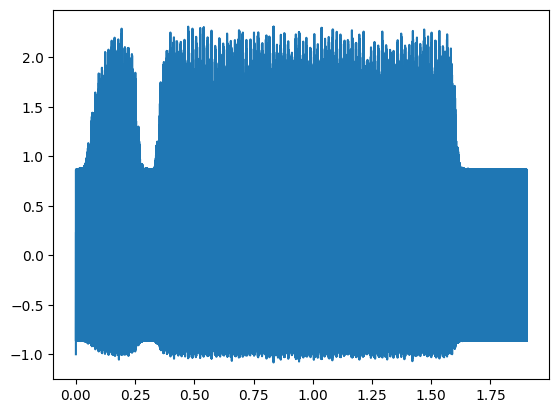

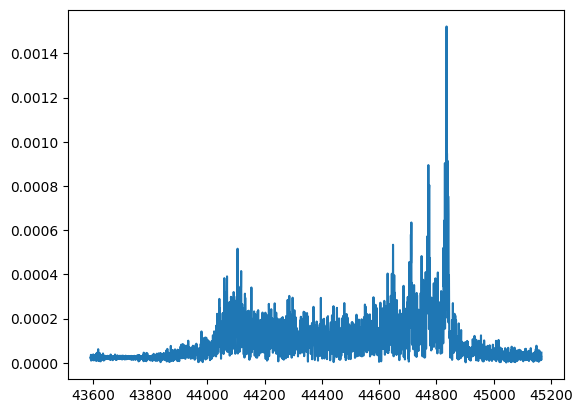

In [55]:
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

plt.figure()
plt.plot(modulated_whistle.modulated.time, filtered)
plt.show()

fourier_frequencies = rfftfreq(modulated_whistle.modulated.sample_number, 1/modulated_whistle.sample_rate)
fourier_array = np.abs(rfft(filtered, norm='forward'))

%matplotlib widget
plt.ion()
plt.figure()
plt.plot(fourier_frequencies[83_000:86_000], fourier_array[83_000:86_000])
plt.show()

In [53]:
fourier_frequencies[85000]

44642.00647865854

In [ ]:
import IPython.display as IPydisp

data_array = modulated_whistle.demodulated_noncoherent.data_array
sample_rate = modulated_whistle.sample_rate
IPydisp.Audio(data_array, rate=sample_rate)

Demodulação não-coerente:

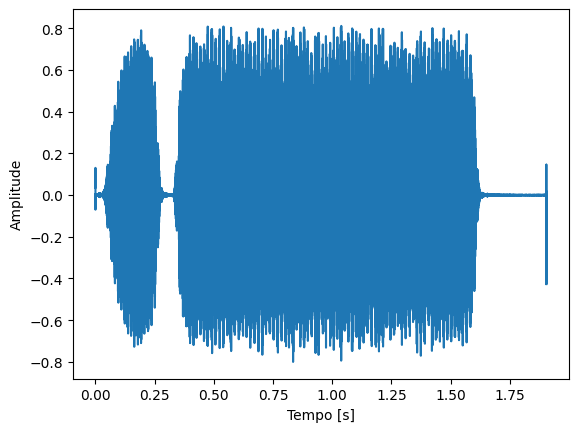

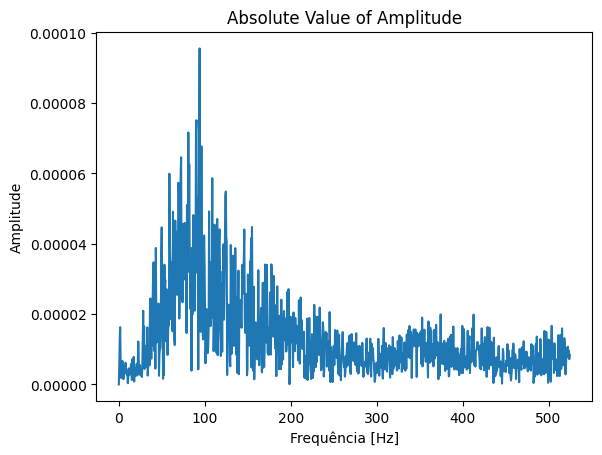

In [11]:
modulated_whistle.demodulated_noncoherent.plot_data(start_index=0, end_index=-1)
modulated_whistle.demodulated_noncoherent.plot_fourier(start_index=0, end_index=1000)

In [12]:
import IPython.display as IPydisp

data_array = modulated_whistle.demodulated_noncoherent.data_array
sample_rate = modulated_whistle.sample_rate
IPydisp.Audio(data_array, rate=sample_rate)

# Modulação AM-DSB-SC de um sinal senoidal $m(t) = \sin{\left( 2 \pi f_m t \right)}$:

# Aplicação da modulação AM-DSB-SC acima para um sinal de áudio:

# Modulação AM-SSB de um sinal senoidal $m(t) = \sin{\left( 2 \pi f_m t \right)}$:

# Aplicação da modulação AM-SSB acima para um sinal de áudio: